# MANU 465 Final Exam - Personality Predictor

### Author:

Liam Bontkes, 25530163

## 1 Project Description

This project uses images of shoes to estimate a person's personality. The project uses CNN to

## 2 Importing the Libraries

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

## 3 Data Preprocessing

In [101]:
from keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale=1./255,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

training_set = image_data_generator.flow_from_directory('training_set',
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='categorical')

test_set = image_data_generator.flow_from_directory('test_set',
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 1397 images belonging to 5 classes.
Found 381 images belonging to 5 classes.


## 4 CNN Model

### 4.1 Build the CNN Model

In [102]:
# initialize the model
cnn_model = tf.keras.models.Sequential()

In [103]:
# add and pool first layer
cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

In [104]:
# add and pool second layer
cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=1))

### 4.2 Flatten the CNN Model

In [105]:
cnn_model.add(tf.keras.layers.Flatten())

### 4.3 Add Connection Layer

In [106]:
cnn_model.add(tf.keras.layers.Dense(units=256, activation='relu'))

### 4.4 Add Output Layers

In [107]:
# add output node for each category
cnn_model.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

### 4.5 Compile the Model

In [108]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 4.6 Train the Model

In [109]:
train_history = cnn_model.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25
44/44 [==============================] - 11s 243ms/step - loss: 0.6283 - accuracy: 0.7566 - val_loss: 0.2504 - val_accuracy: 0.8005
Epoch 2/25
44/44 [==============================] - 11s 254ms/step - loss: 0.1054 - accuracy: 0.9091 - val_loss: 0.2922 - val_accuracy: 0.8031
Epoch 3/25
44/44 [==============================] - 11s 239ms/step - loss: 0.0876 - accuracy: 0.9356 - val_loss: 0.2102 - val_accuracy: 0.8136
Epoch 4/25
44/44 [==============================] - 10s 231ms/step - loss: 0.0610 - accuracy: 0.9549 - val_loss: 0.2231 - val_accuracy: 0.8425
Epoch 5/25
44/44 [==============================] - 10s 234ms/step - loss: 0.0581 - accuracy: 0.9549 - val_loss: 0.2365 - val_accuracy: 0.8478
Epoch 6/25
44/44 [==============================] - 10s 231ms/step - loss: 0.0454 - accuracy: 0.9649 - val_loss: 0.2017 - val_accuracy: 0.8871
Epoch 7/25
44/44 [==============================] - 10s 234ms/step - loss: 0.0457 - accuracy: 0.9664 - val_loss: 0.2385 - val_accuracy: 0.8793

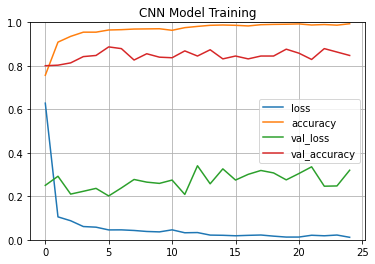

In [115]:
# plot the accuracy and loss

performance = pd.DataFrame(train_history.history)

performance.plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("CNN Model Training")
plt.show()

## 5 Make a Prediction

In [113]:
from keras.preprocessing import image

prediction_image = image.load_img('single_prediction.jpg', target_size=(64, 64))
prediction_image = image.img_to_array(prediction_image)
prediction_image = np.expand_dims(prediction_image, axis=0)

result = cnn_model.predict(prediction_image)

shoe_result = {
    0: 'Athletic',
    1: 'Clogs',
    2: 'Flats',
    3: 'Heels',
    4: 'Loafers'
}

shoe_personality_table = {
    0: 'The person is someone who’s very confident, very goal-oriented, and very organized.',
    1: 'The person is open spirited, and very outdoorsy. They love nature and the whole regenerative effect of being outdoors.',
    2: 'The person is focused, very modest, and generous.',
    3: 'The person really loves and values beauty.',
    4: 'The person is very responsible, very detail-driven, very much the person who manages all the details.'
}

personality = 0
for match, shoe in enumerate(result[0]):
    if match:
        personality = shoe
        break

print(shoe_personality_table[personality])
print(result)

The person is someone who’s very confident, very goal-oriented, and very organized.
[[1. 0. 0. 0. 0.]]


## 6 Conclusion

Over the CNN model performs decently well. As shown in the CNN Model Training graph, the accuracy
and loss were diverging from the validation accuracy and validation loss. This suggests that the
model was over-fitting the data. Despite this, the CNN model correctly classified the single image
test shoe (my shoe).

To improve the CNN model's accuracy, a larger and more diverse dataset should be used. Due to the
time constraints of the exam, I was unable to do this.